In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train (1).csv')
df.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

In [3]:
df.shape


(100000, 28)

In [4]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
df_test = pd.read_csv('test (1).csv')
df_test.head()

ID Customer_ID      Month             Name  Age          SSN  \
0  0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
1  0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
2  0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
3  0x160d   CUS_0xd40   December    Aaron Maashoh  24_  821-00-0265   
4  0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12            1824.843333                  3  ...   
2  Scientist      19114.12            1824.843333                  3  ...   
3  Scientist      19114.12                    NaN                  3  ...   
4    _______      34847.84            3037.986667                  2  ...   

   Num_Credit_Inquiries  Credit_Mix Outstanding_Debt Credit_Utilization_Ratio  \
0                2022.0        Good           809.98                35.030402   
1                   4.0        Good           809.98                33.053114   
2                   4.0        Good           809.98                33.811894   
3                   4.0        Good           809.98                32.430559   
4                   5.0        Good           605.03                25.926822   

       Credit_History_Age Payment_of_Min_Amount Total_EMI_per_month  \
0   22 Years and 9 Months                    No           49.574949   
1  22 Years and 10 Months                    No           49.574949   
2                     NaN                    No           49.574949   
3   23 Years and 0 Months                    No           49.574949   
4   27 Years and 3 Months                    No           18.816215   

   Amount_invested_monthly                 Payment_Behaviour  \
0       236.64268203272135    Low_spent_Small_value_payments   
1       21.465380264657146  High_spent_Medium_value_payments   
2       148.23393788500925   Low_spent_Medium_value_payments   
3        39.08251089460281  High_spent_Medium_value_payments   
4       39.684018417945296   High_spent_Large_value_payments   

      Monthly_Balance  
0  186.26670208571772  
1  361.44400385378196  
2  264.67544623342997  
3  343.82687322383634  
4   485.2984336755923  

[5 rows x 27 columns]

In [7]:
df_test.shape

(50000, 27)

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [9]:
(df_test.isnull().sum()/len(df_test))*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                        10.030
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       14.996
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       6.996
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         2.070
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           8.940
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.542
Payment_Behaviour            0.000
Monthly_Balance              1.124
dtype: float64

In [10]:
#Analysing Credit score column

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

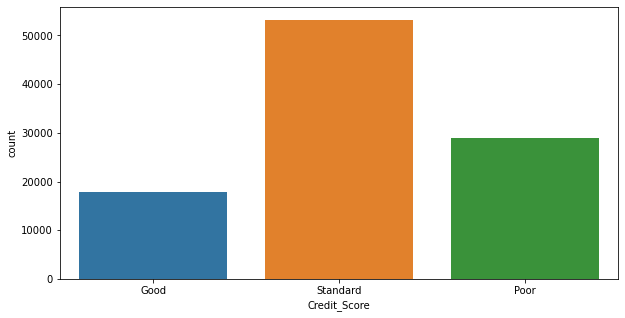

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='Credit_Score', data = df)

In [12]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [13]:
for col in df.columns:
    print(col, '  -  ',df[col].nunique())

ID   -   100000
Customer_ID   -   12500
Month   -   8
Name   -   10139
Age   -   1788
SSN   -   12501
Occupation   -   16
Annual_Income   -   18940
Monthly_Inhand_Salary   -   13235
Num_Bank_Accounts   -   943
Num_Credit_Card   -   1179
Interest_Rate   -   1750
Num_of_Loan   -   434
Type_of_Loan   -   6260
Delay_from_due_date   -   73
Num_of_Delayed_Payment   -   749
Changed_Credit_Limit   -   4384
Num_Credit_Inquiries   -   1223
Credit_Mix   -   4
Outstanding_Debt   -   13178
Credit_Utilization_Ratio   -   100000
Credit_History_Age   -   404
Payment_of_Min_Amount   -   3
Total_EMI_per_month   -   14950
Amount_invested_monthly   -   91049
Payment_Behaviour   -   7
Monthly_Balance   -   98792
Credit_Score   -   3


In [14]:
df.shape

(100000, 28)

In [15]:
credit_df_columns=list(df.columns)
credit_df_columns

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [16]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

### Checking unique values and removing garbage values 

In [17]:
index=[2,6,9,10,12,13,15,17,18,22,25,27]
credit_df_categorical_columns=[]
for i in index:
    credit_df_categorical_columns.append(credit_df_columns[i])

# Number of distinct values in a categorial column

for item in credit_df_categorical_columns:
    print("Printing unique values for "+item +" column")
    print(df[item].nunique())
    print("\n\n")

Printing unique values for Month column
8



Printing unique values for Occupation column
16



Printing unique values for Num_Bank_Accounts column
943



Printing unique values for Num_Credit_Card column
1179



Printing unique values for Num_of_Loan column
434



Printing unique values for Type_of_Loan column
6260



Printing unique values for Num_of_Delayed_Payment column
749



Printing unique values for Num_Credit_Inquiries column
1223



Printing unique values for Credit_Mix column
4



Printing unique values for Payment_of_Min_Amount column
3



Printing unique values for Payment_Behaviour column
7



Printing unique values for Credit_Score column
3





In [18]:
df['Occupation'].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [19]:
df['Occupation']=df['Occupation'].replace(to_replace='_______',value = 'Unknown')

In [20]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [21]:
df['Payment_Behaviour']=df['Payment_Behaviour'].replace(to_replace='!@9#%8',value = 'Unknown')

In [22]:
df['Credit_Mix'].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [23]:
df['Credit_Mix']=df['Credit_Mix'].replace(to_replace='_',value = 'Unknown')

In [24]:
#Getting the list of columns with data type as Object

credit_df_object_dataframe=df.select_dtypes(include=['object'])
credit_df_object_columns=list(credit_df_object_dataframe.columns)

In [25]:
for column in credit_df_object_columns:
    if column in['Occupation','Credit_Mix']:
        pass
    else:
        df[column]=df[column].str.rstrip('_').str.lstrip('_')

In [26]:
df['Changed_Credit_Limit'].replace('',np.NaN, inplace=True)

In [27]:
# Converting Object datatype to required ones for selected columns
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].astype('float64')

df['Amount_invested_monthly']=df['Amount_invested_monthly'].astype('float64')

df['Monthly_Balance']=df['Monthly_Balance'].astype('float64')

df['Annual_Income']=df['Annual_Income'].astype('float64')

df['Num_of_Loan']=df['Num_of_Loan'].astype('float64')

df['Age']=df['Age'].astype('int64')

df['Num_Credit_Inquiries']=df['Num_Credit_Inquiries'].astype('float64')

df['Outstanding_Debt']=df['Outstanding_Debt'].astype('float64')

df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].astype('float64')

In [28]:
#The Credit_History_Age feature has values like '22 Years and 9 Months'.
# We will try to convert this value into 22.75 (the unit will be years)

#Split the feature into two based on ' and '
df[['Credit_History_Age_YR', 'Credit_Hist_mnt']]=df['Credit_History_Age'].str.split(pat=' and ', expand=True)

# Typecast to float
df['Credit_History_Age_YR']=df['Credit_History_Age_YR'].str.rstrip(' Years').astype('float')
df['Credit_Hist_mnt']=df['Credit_Hist_mnt'].str.rstrip(' Months').astype('float')

#Add the two features - unit is years
df['Credit_History_Age_YR'] = df['Credit_History_Age_YR'] + (df['Credit_Hist_mnt']/12)

#Drop the features that are not required
df.drop(['Credit_History_Age','Credit_Hist_mnt'], axis=1, inplace=True)



In [29]:
df['Credit_History_Age_YR'] 

0        22.083333
1              NaN
2        22.250000
3        22.333333
4        22.416667
           ...    
99995    31.500000
99996    31.583333
99997    31.666667
99998    31.750000
99999    31.833333
Name: Credit_History_Age_YR, Length: 100000, dtype: float64

In [30]:
#Checking the number of Nulls in dataframe
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              2868
Credit_Score                    0
Credit_History_Age_YR        9030
dtype: int64

In [31]:
#Checking the percentage of Nulls/NaN/Na in dataset
df.isna().sum()/len(df)*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         2.091
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              2.868
Credit_Score                 0.000
Credit_History_Age_YR        9.030
dtype: float64

In [32]:
# Replacing Null values of Numeric columns by Median of the particular data set
# Getting the Median of select columns by Occupation
Median_by_group=df.groupby(['Occupation'])['Monthly_Balance','Num_of_Delayed_Payment','Amount_invested_monthly','Monthly_Inhand_Salary','Num_Credit_Inquiries','Credit_History_Age_YR','Changed_Credit_Limit'].agg('median')

In [33]:
#Joining the dataframe containing Median of the different columns containing Null per Occupation
df = df.merge(Median_by_group,how='left', on='Occupation')

In [34]:
#Replacing the Nulls by the Median of each Occupation

df.loc[df['Monthly_Balance_x'].isna(), 'Monthly_Balance_x'] = df['Monthly_Balance_y']
df.loc[df['Monthly_Inhand_Salary_x'].isna(), 'Monthly_Inhand_Salary_x'] = df['Monthly_Inhand_Salary_y']
df.loc[df['Num_of_Delayed_Payment_x'].isna(), 'Num_of_Delayed_Payment_x'] = df['Num_of_Delayed_Payment_y']
df.loc[df['Amount_invested_monthly_x'].isna(), 'Amount_invested_monthly_x'] = df['Amount_invested_monthly_y']
df.loc[df['Num_Credit_Inquiries_x'].isna(), 'Num_Credit_Inquiries_x'] = df['Num_Credit_Inquiries_y']
df.loc[df['Credit_History_Age_YR_x'].isna(), 'Credit_History_Age_YR_x'] = df['Credit_History_Age_YR_y']
df.loc[df['Changed_Credit_Limit_x'].isna(), 'Changed_Credit_Limit_x'] = df['Changed_Credit_Limit_y']

In [35]:
#Replacing Null values of 'Type_of_Loan' columns with 'Not Provided'

df['Type_of_Loan'].fillna('Not Provided', inplace=True)

In [36]:
#Checking if duplicate records exist at a Customer, Month level

df[df.duplicated(['Customer_ID','Month'])]

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary_x, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment_x, Changed_Credit_Limit_x, Num_Credit_Inquiries_x, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly_x, Payment_Behaviour, Monthly_Balance_x, Credit_Score, Credit_History_Age_YR_x, Monthly_Balance_y, Num_of_Delayed_Payment_y, Amount_invested_monthly_y, Monthly_Inhand_Salary_y, Num_Credit_Inquiries_y, Credit_History_Age_YR_y, Changed_Credit_Limit_y]
Index: []

[0 rows x 35 columns]

In [37]:
#Dropping columns which don't affect the Credit Score
df=df.drop(['Name','SSN','ID','Customer_ID'], axis=1)

In [38]:
#Dropping Columns from the right table with _y
df.drop(columns=['Monthly_Balance_y', 'Monthly_Inhand_Salary_y', 'Num_of_Delayed_Payment_y','Amount_invested_monthly_y','Num_Credit_Inquiries_y','Credit_History_Age_YR_y','Changed_Credit_Limit_y'], inplace=True)

#Renaming Columns from the left table with _x
df.rename(columns={"Monthly_Balance_x":"Monthly_Balance", "Monthly_Inhand_Salary_x":"Monthly_Inhand_Salary", "Num_Credit_Inquiries_x":"Num_Credit_Inquiries", "Num_of_Delayed_Payment_x":"Num_of_Delayed_Payment", "Amount_invested_monthly_x":"Amount_invested_monthly", "Credit_History_Age_YR_x":"Credit_History_Age","Changed_Credit_Limit_x":"Changed_Credit_Limit"} ,inplace=True)


In [39]:
#After filling the missing values, converting selected columns from float datatype to int datatype and from object to category
df['Month']=df['Month'].astype('category')

df['Occupation']=df['Occupation'].astype('category')


df['Credit_Mix']=df['Credit_Mix'].astype('category')


df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].astype('category')


df['Payment_Behaviour']=df['Payment_of_Min_Amount'].astype('category')


df['Type_of_Loan']=df['Type_of_Loan'].astype('category')

df['Credit_Score']=df['Credit_Score'].astype('category')

df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].astype('int64')

df['Num_of_Loan']=df['Num_of_Loan'].astype('int64')

df['Age']=df['Age'].astype('int64')

df['Num_Credit_Inquiries']=df['Num_Credit_Inquiries'].astype('int64')

# Exploratorty Data Analysis

## Univariate Analysis

In [40]:
# We can select what numerical variables we need in our descriptive analysis
credit_df_not_object_dataframe=df.select_dtypes(exclude=['category','object'])
credit_df_not_object_columns=list(credit_df_not_object_dataframe.columns)
credit_df_Measures_column=[x for x in credit_df_not_object_columns if x not in credit_df_categorical_columns]

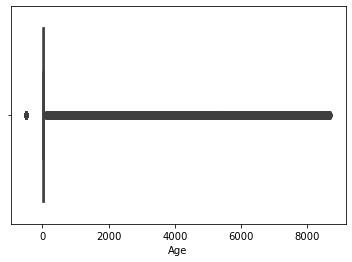

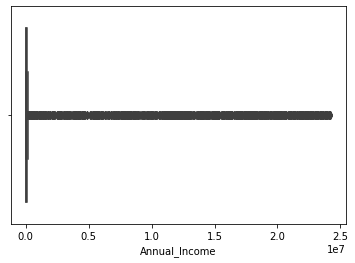

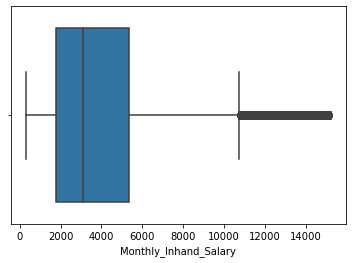

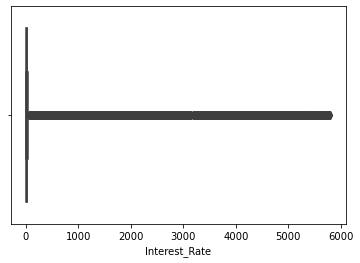

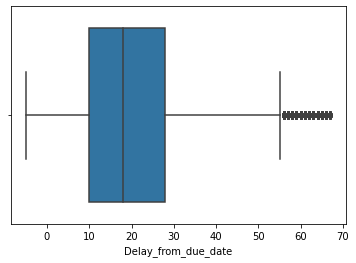

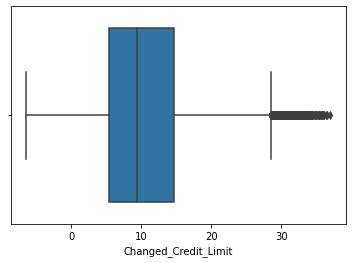

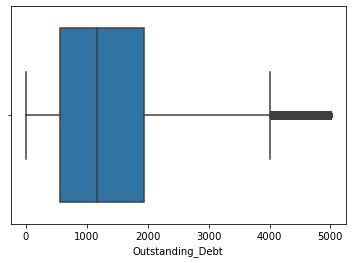

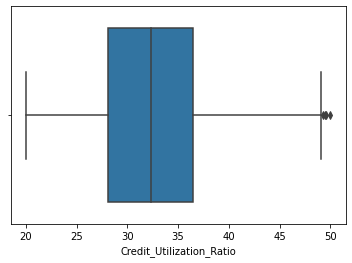

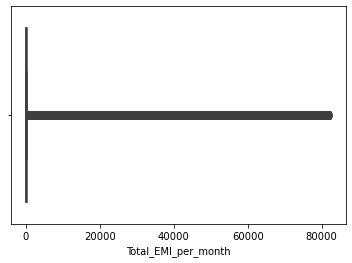

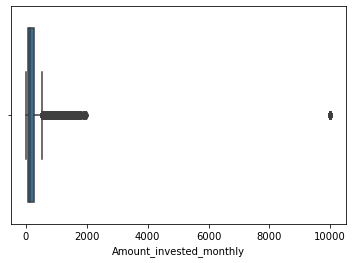

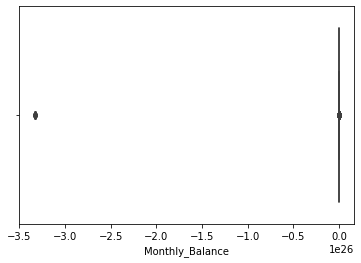

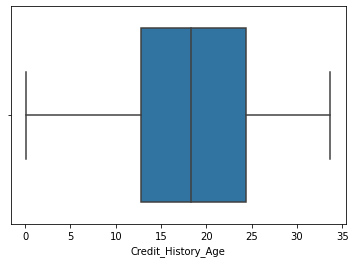

In [41]:
#Plotting Boxplot to check the outliers before
for  i in credit_df_Measures_column:
    sns.boxplot(x=df[i])
    plt.show()
    #sns.histplot(x=credit_train_df[i])
    #plt.show()

## Bi-Variate Analysis

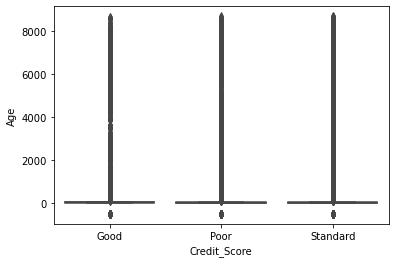

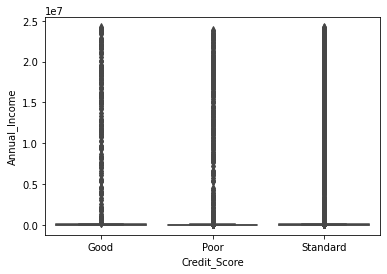

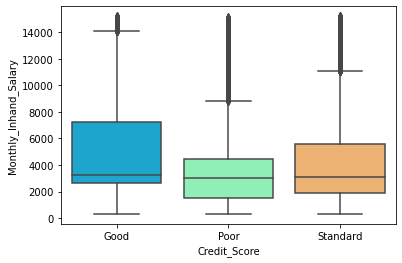

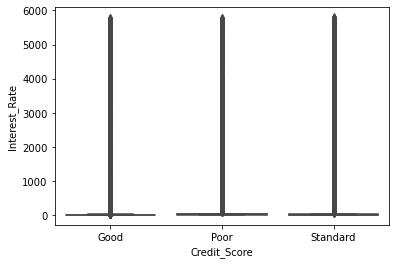

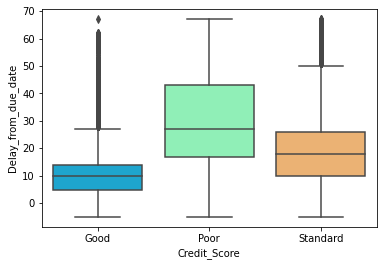

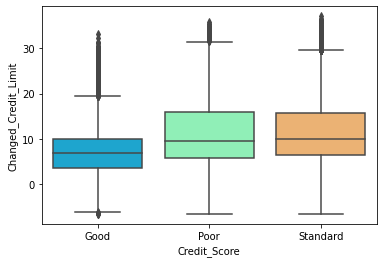

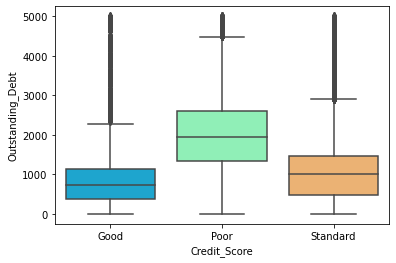

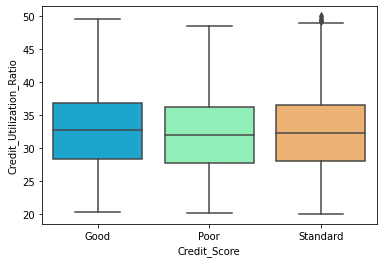

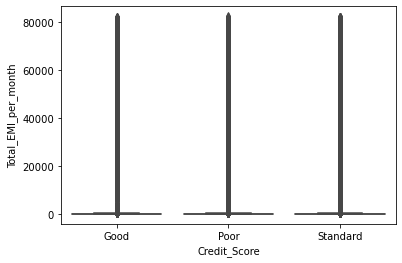

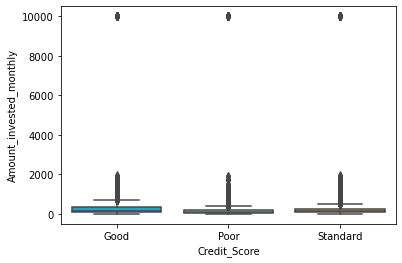

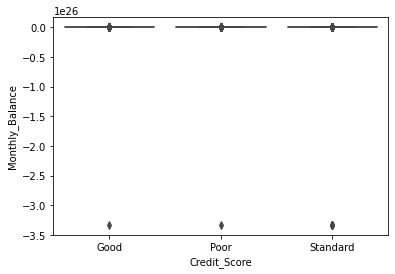

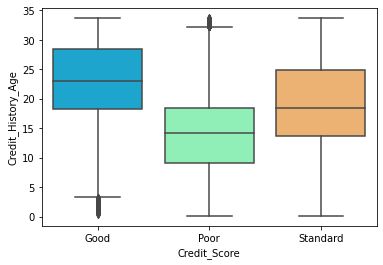

In [42]:
#Relationship between Credit Score with other Numerical Column

for i in credit_df_Measures_column:
    sns.boxplot(x=df['Credit_Score'],y=df[i],palette='rainbow',data=df)
    plt.show()

# Outlier Detection

In [43]:
#Doing outlier detection using Inter Quartile Range
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code


for  i in credit_df_not_object_columns:
    sample_outliers = detect_outliers_iqr(df[i])
    print("Number Outliers of", i ,"from IQR method: \n", len(sample_outliers))
    print("\n--------------\n")

Number Outliers of Age from IQR method: 
 2781

--------------

Number Outliers of Annual_Income from IQR method: 
 2783

--------------

Number Outliers of Monthly_Inhand_Salary from IQR method: 
 4365

--------------

Number Outliers of Num_Bank_Accounts from IQR method: 
 1315

--------------

Number Outliers of Num_Credit_Card from IQR method: 
 2271

--------------

Number Outliers of Interest_Rate from IQR method: 
 2034

--------------

Number Outliers of Num_of_Loan from IQR method: 
 4348

--------------

Number Outliers of Delay_from_due_date from IQR method: 
 4002

--------------

Number Outliers of Num_of_Delayed_Payment from IQR method: 
 736

--------------

Number Outliers of Changed_Credit_Limit from IQR method: 
 1177

--------------

Number Outliers of Num_Credit_Inquiries from IQR method: 
 1650

--------------

Number Outliers of Outstanding_Debt from IQR method: 
 5272

--------------

Number Outliers of Credit_Utilization_Ratio from IQR method: 
 4

-------------

In [44]:
 #To see the skewness of the numerical columns before outlier treatment:
for i in credit_df_not_object_columns:
    print("Skewness for column",i,":  ",df[i].skew())
    print("10th quantile for ",i," : ",df[i].quantile(0.10))
    print("90th quantile for ",i," : ",df[i].quantile(0.90),"\n")

Skewness for column Age :   9.207630605120817
10th quantile for  Age  :  19.0
90th quantile for  Age  :  50.0 

Skewness for column Annual_Income :   12.51217317277124
10th quantile for  Annual_Income  :  14293.345
90th quantile for  Annual_Income  :  113085.87 

Skewness for column Monthly_Inhand_Salary :   1.3488959788869934
10th quantile for  Monthly_Inhand_Salary  :  1184.2612916666674
90th quantile for  Monthly_Inhand_Salary  :  8595.465 

Skewness for column Num_Bank_Accounts :   11.202482481405436
10th quantile for  Num_Bank_Accounts  :  2.0
90th quantile for  Num_Bank_Accounts  :  9.0 

Skewness for column Num_Credit_Card :   8.45801656652519
10th quantile for  Num_Credit_Card  :  3.0
90th quantile for  Num_Credit_Card  :  9.0 

Skewness for column Interest_Rate :   9.006015053977878
10th quantile for  Interest_Rate  :  4.0
90th quantile for  Interest_Rate  :  29.0 

Skewness for column Num_of_Loan :   15.980049299258908
10th quantile for  Num_of_Loan  :  0.0
90th quantile for 

## Outlier Treatment

In [45]:
#Doing outlier treatment by capping the upper limit to 90th percentile and flooring the lower limit to 10th percentile
for i in credit_df_not_object_columns:
    lower_bound=df[i].quantile(0.10)
    upper_bound=df[i].quantile(0.90)
    df[i] = np.where(df[i] <lower_bound, lower_bound,df[i])
    df[i] = np.where(df[i] >upper_bound, upper_bound,df[i])

In [46]:
 #To see the skewness of the numerical columns after outlier treatment:
    
for i in credit_df_not_object_columns:
    print(i,df[i].skew())
    print("10th quantile for ",i," : ",df[i].quantile(0.10))
    print("10th quantile for ",i," : ",df[i].quantile(0.90),"\n")

Age 0.1214446781112327
10th quantile for  Age  :  19.0
10th quantile for  Age  :  50.0 

Annual_Income 0.7188369743264137
10th quantile for  Annual_Income  :  14293.345
10th quantile for  Annual_Income  :  113085.87 

Monthly_Inhand_Salary 0.8155006129250585
10th quantile for  Monthly_Inhand_Salary  :  1184.3010041666669
10th quantile for  Monthly_Inhand_Salary  :  8595.465 

Num_Bank_Accounts -0.02099236788790406
10th quantile for  Num_Bank_Accounts  :  2.0
10th quantile for  Num_Bank_Accounts  :  9.0 

Num_Credit_Card 0.2611075187031218
10th quantile for  Num_Credit_Card  :  3.0
10th quantile for  Num_Credit_Card  :  9.0 

Interest_Rate 0.3966709316353935
10th quantile for  Interest_Rate  :  4.0
10th quantile for  Interest_Rate  :  29.0 

Num_of_Loan 0.19079429219353083
10th quantile for  Num_of_Loan  :  0.0
10th quantile for  Num_of_Loan  :  7.0 

Delay_from_due_date 0.6433478617077291
10th quantile for  Delay_from_due_date  :  5.0
10th quantile for  Delay_from_due_date  :  45.0 

N

## Analysis Post Data/Outlier Treatment

In [47]:
for i in credit_df_Measures_column:
    
    print(f"The value of mean for column {i}, : \n", df[i].mean())
    print(f"The value of median for column {i}, : \n", df[i].median())
    print(f"The value of Standard Deviation for column {i}, : \n", df[i].std())
    print("\n\n")

The value of mean for column Age, : 
 33.50536
The value of median for column Age, : 
 33.0
The value of Standard Deviation for column Age, : 
 10.220530116522704



The value of mean for column Annual_Income, : 
 49379.485343637665
The value of median for column Annual_Income, : 
 37578.61
The value of Standard Deviation for column Annual_Income, : 
 33245.26736297113



The value of mean for column Monthly_Inhand_Salary, : 
 3839.1133549268584
The value of median for column Monthly_Inhand_Salary, : 
 3116.8925
The value of Standard Deviation for column Monthly_Inhand_Salary, : 
 2388.467726450483



The value of mean for column Interest_Rate, : 
 14.75125
The value of median for column Interest_Rate, : 
 13.0
The value of Standard Deviation for column Interest_Rate, : 
 8.233914707536545



The value of mean for column Delay_from_due_date, : 
 20.42116
The value of median for column Delay_from_due_date, : 
 18.0
The value of Standard Deviation for column Delay_from_due_date, : 
 12.5

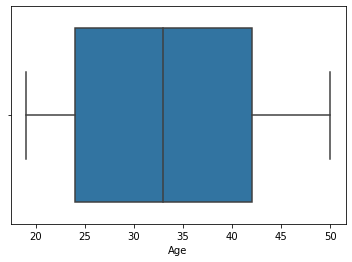

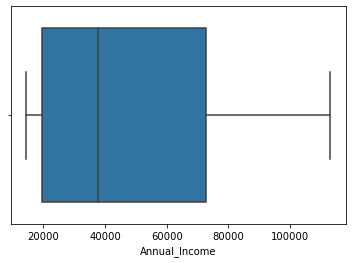

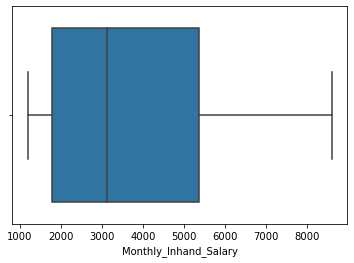

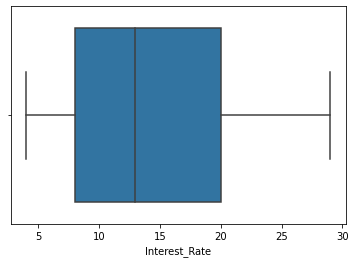

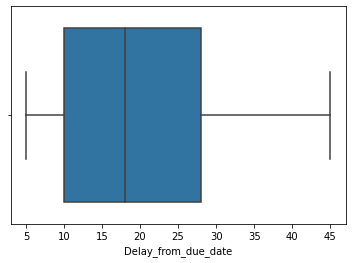

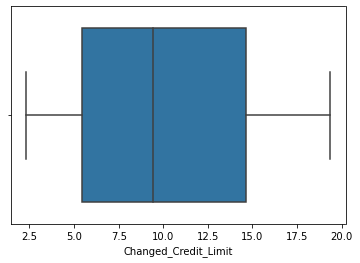

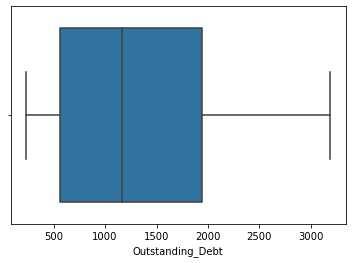

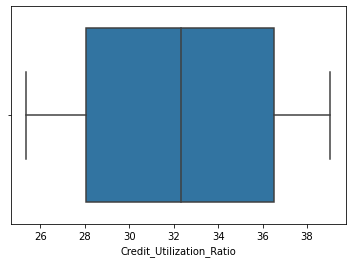

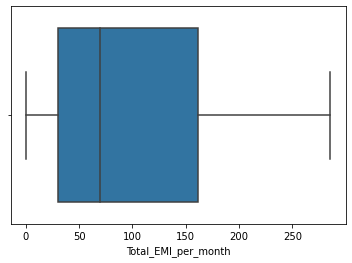

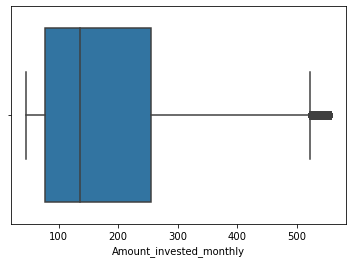

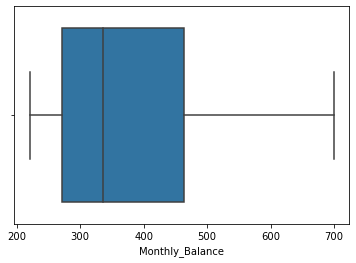

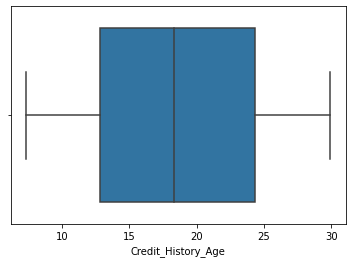

In [48]:
#Plotting Boxplot to check the outliers aftr
for  i in credit_df_Measures_column:
    sns.boxplot(x=df[i])
    plt.show()
   # sns.histplot(x=credit_train_df[i])
   # plt.show()

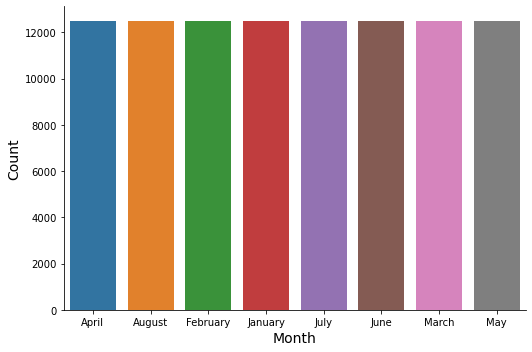

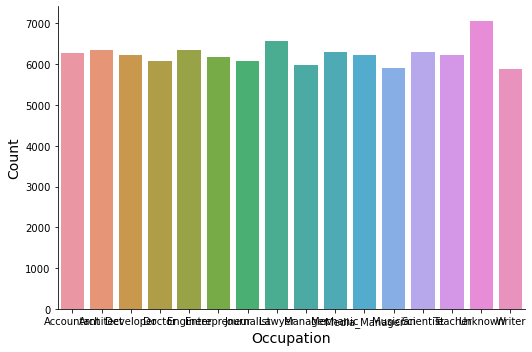

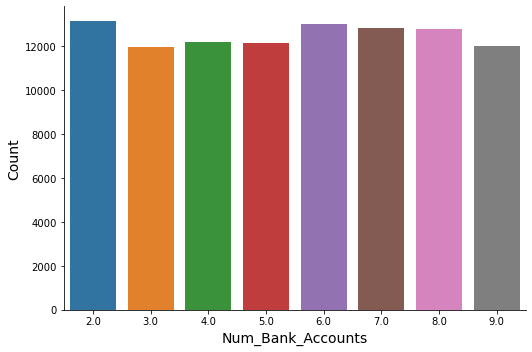

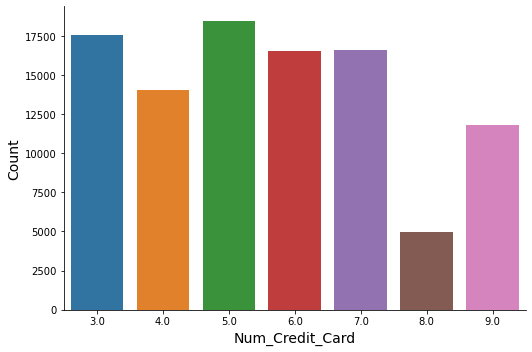

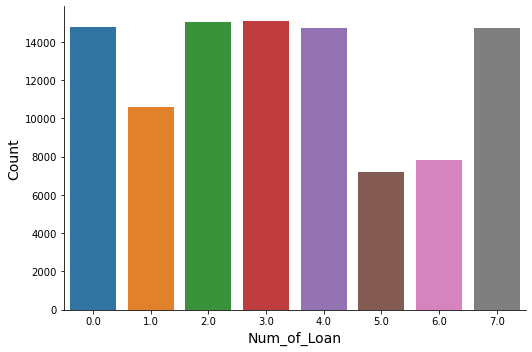

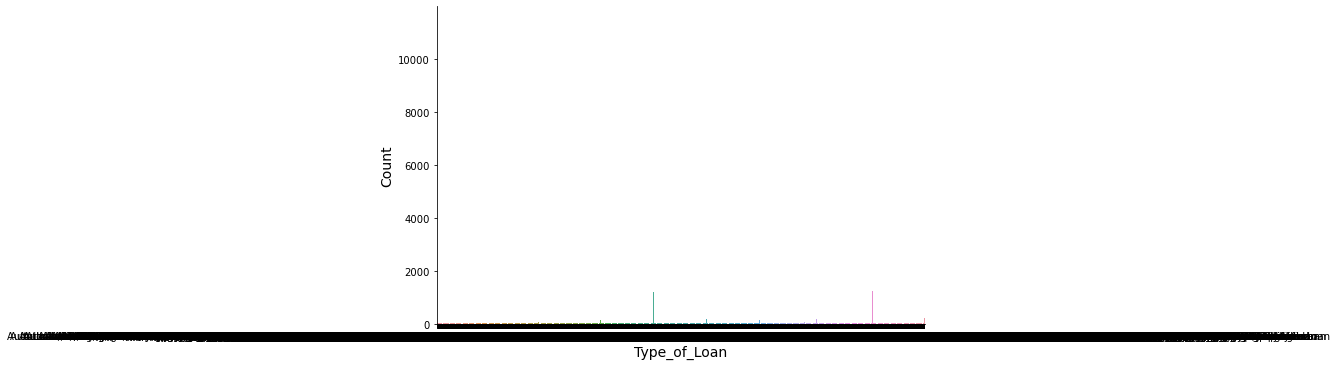

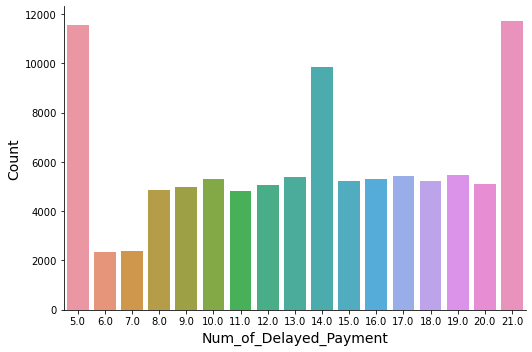

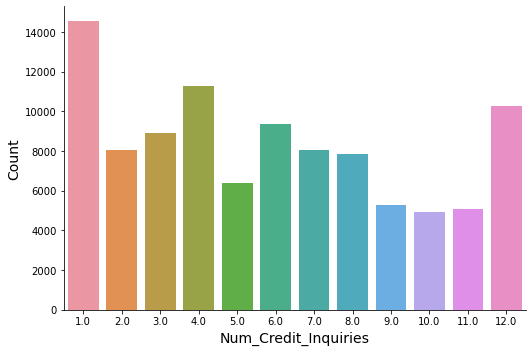

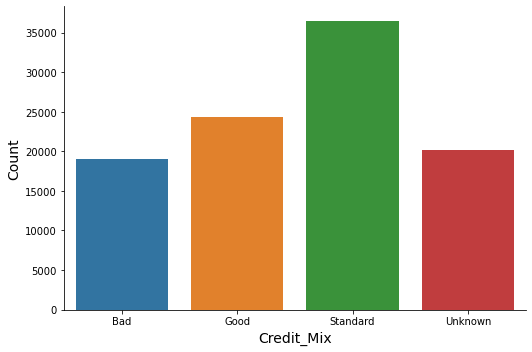

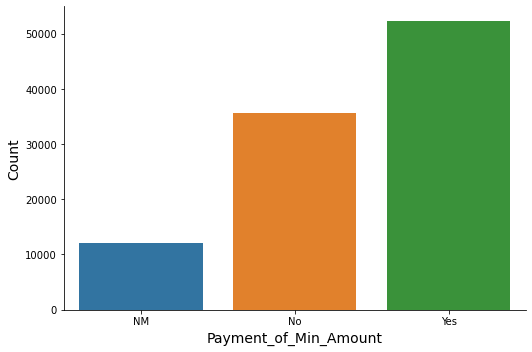

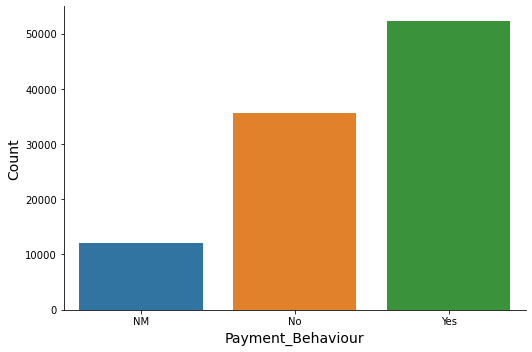

In [49]:
for i in credit_df_categorical_columns:
    if i in['Credit_Score']:
        pass
    else:
        
        sns.catplot(x=i, 
            kind="count", 
            data=df,
            height=5,
            aspect=1.5)
        plt.xlabel(i, size=14)
        plt.ylabel("Count", size=14)
        plt.tight_layout()
        plt.savefig("Seaborn_countplot_with_catplot.png")
        plt.show()

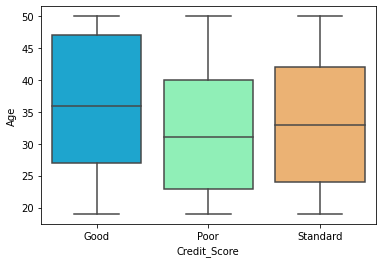

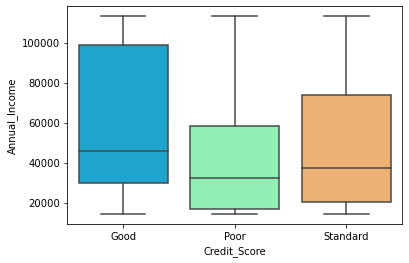

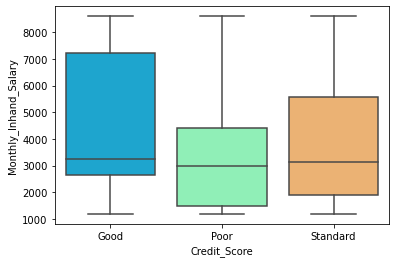

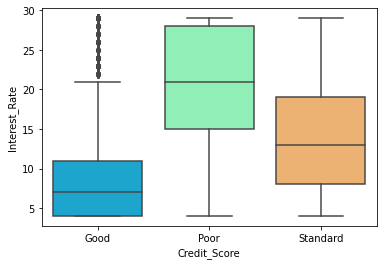

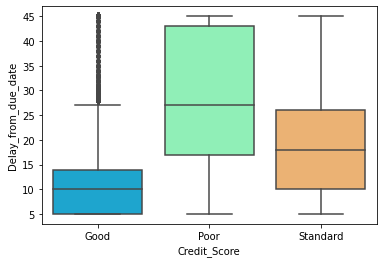

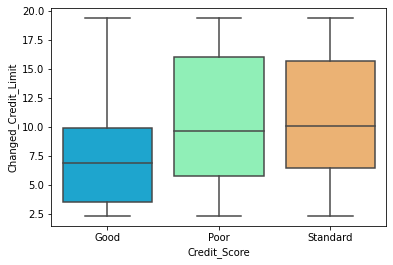

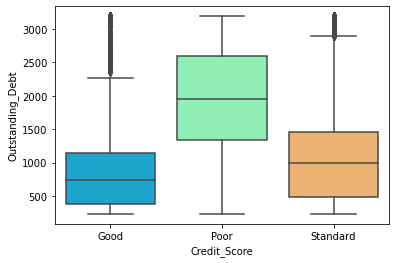

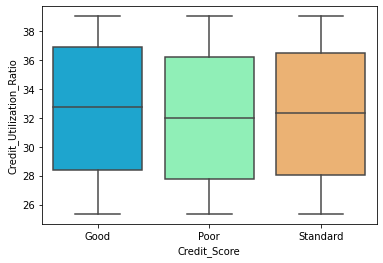

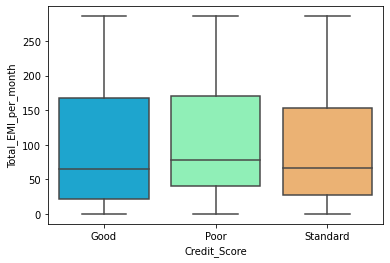

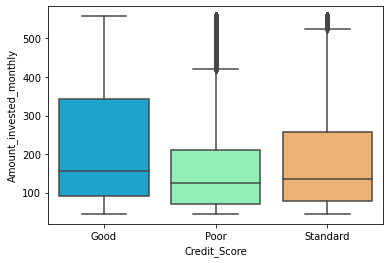

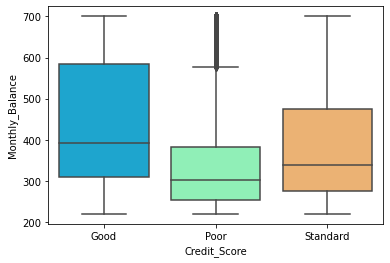

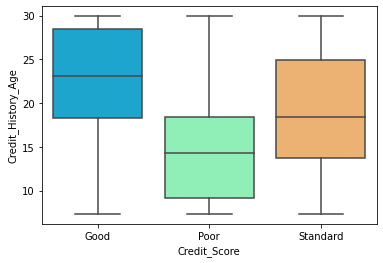

In [50]:
#Relationship between Credit Score with other Numerical Column

for i in credit_df_Measures_column:
    sns.boxplot(x=df['Credit_Score'],y=df[i],palette='rainbow',data=df)
    plt.show()

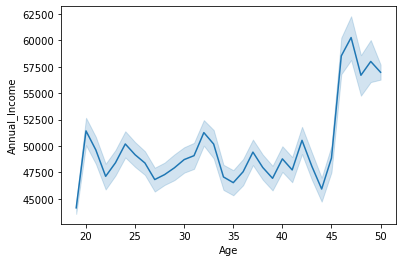

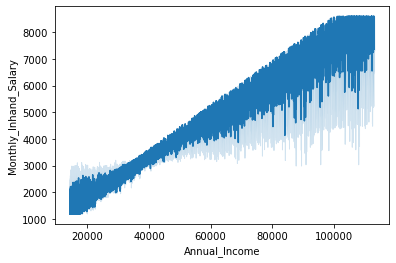

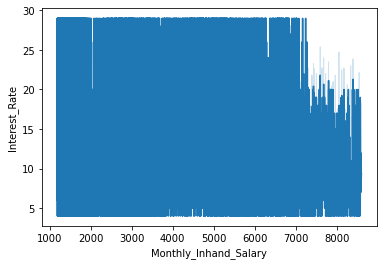

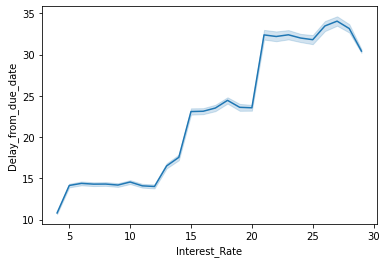

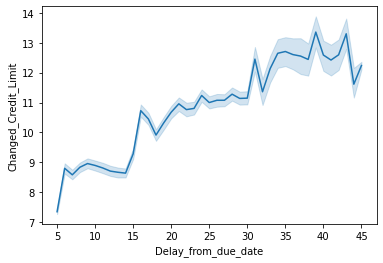

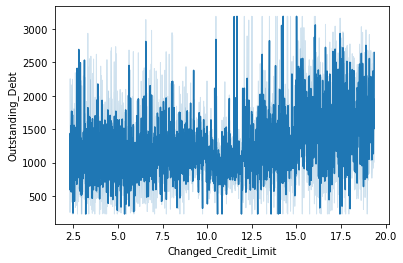

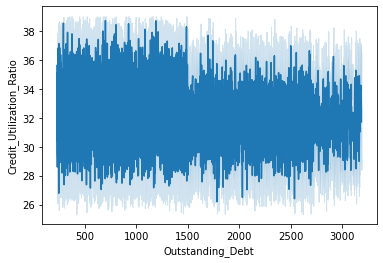

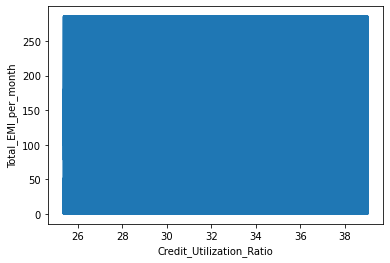

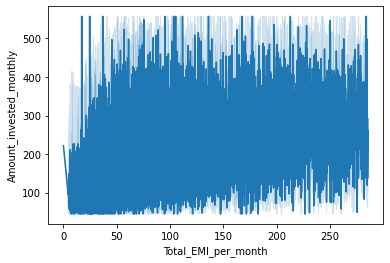

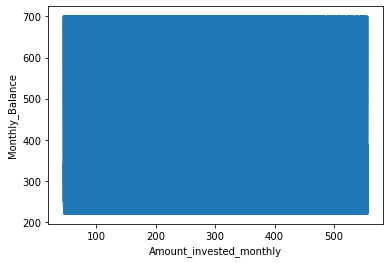

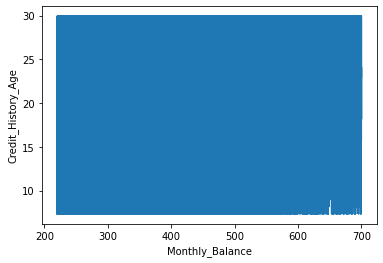

In [51]:
for i in range(len(credit_df_Measures_column)-1):
    sns.lineplot(x=df[credit_df_Measures_column[i]],y=df[credit_df_Measures_column[i+1]],palette='rainbow',data=df)
    plt.show()

<Figure size 1152x1152 with 0 Axes>

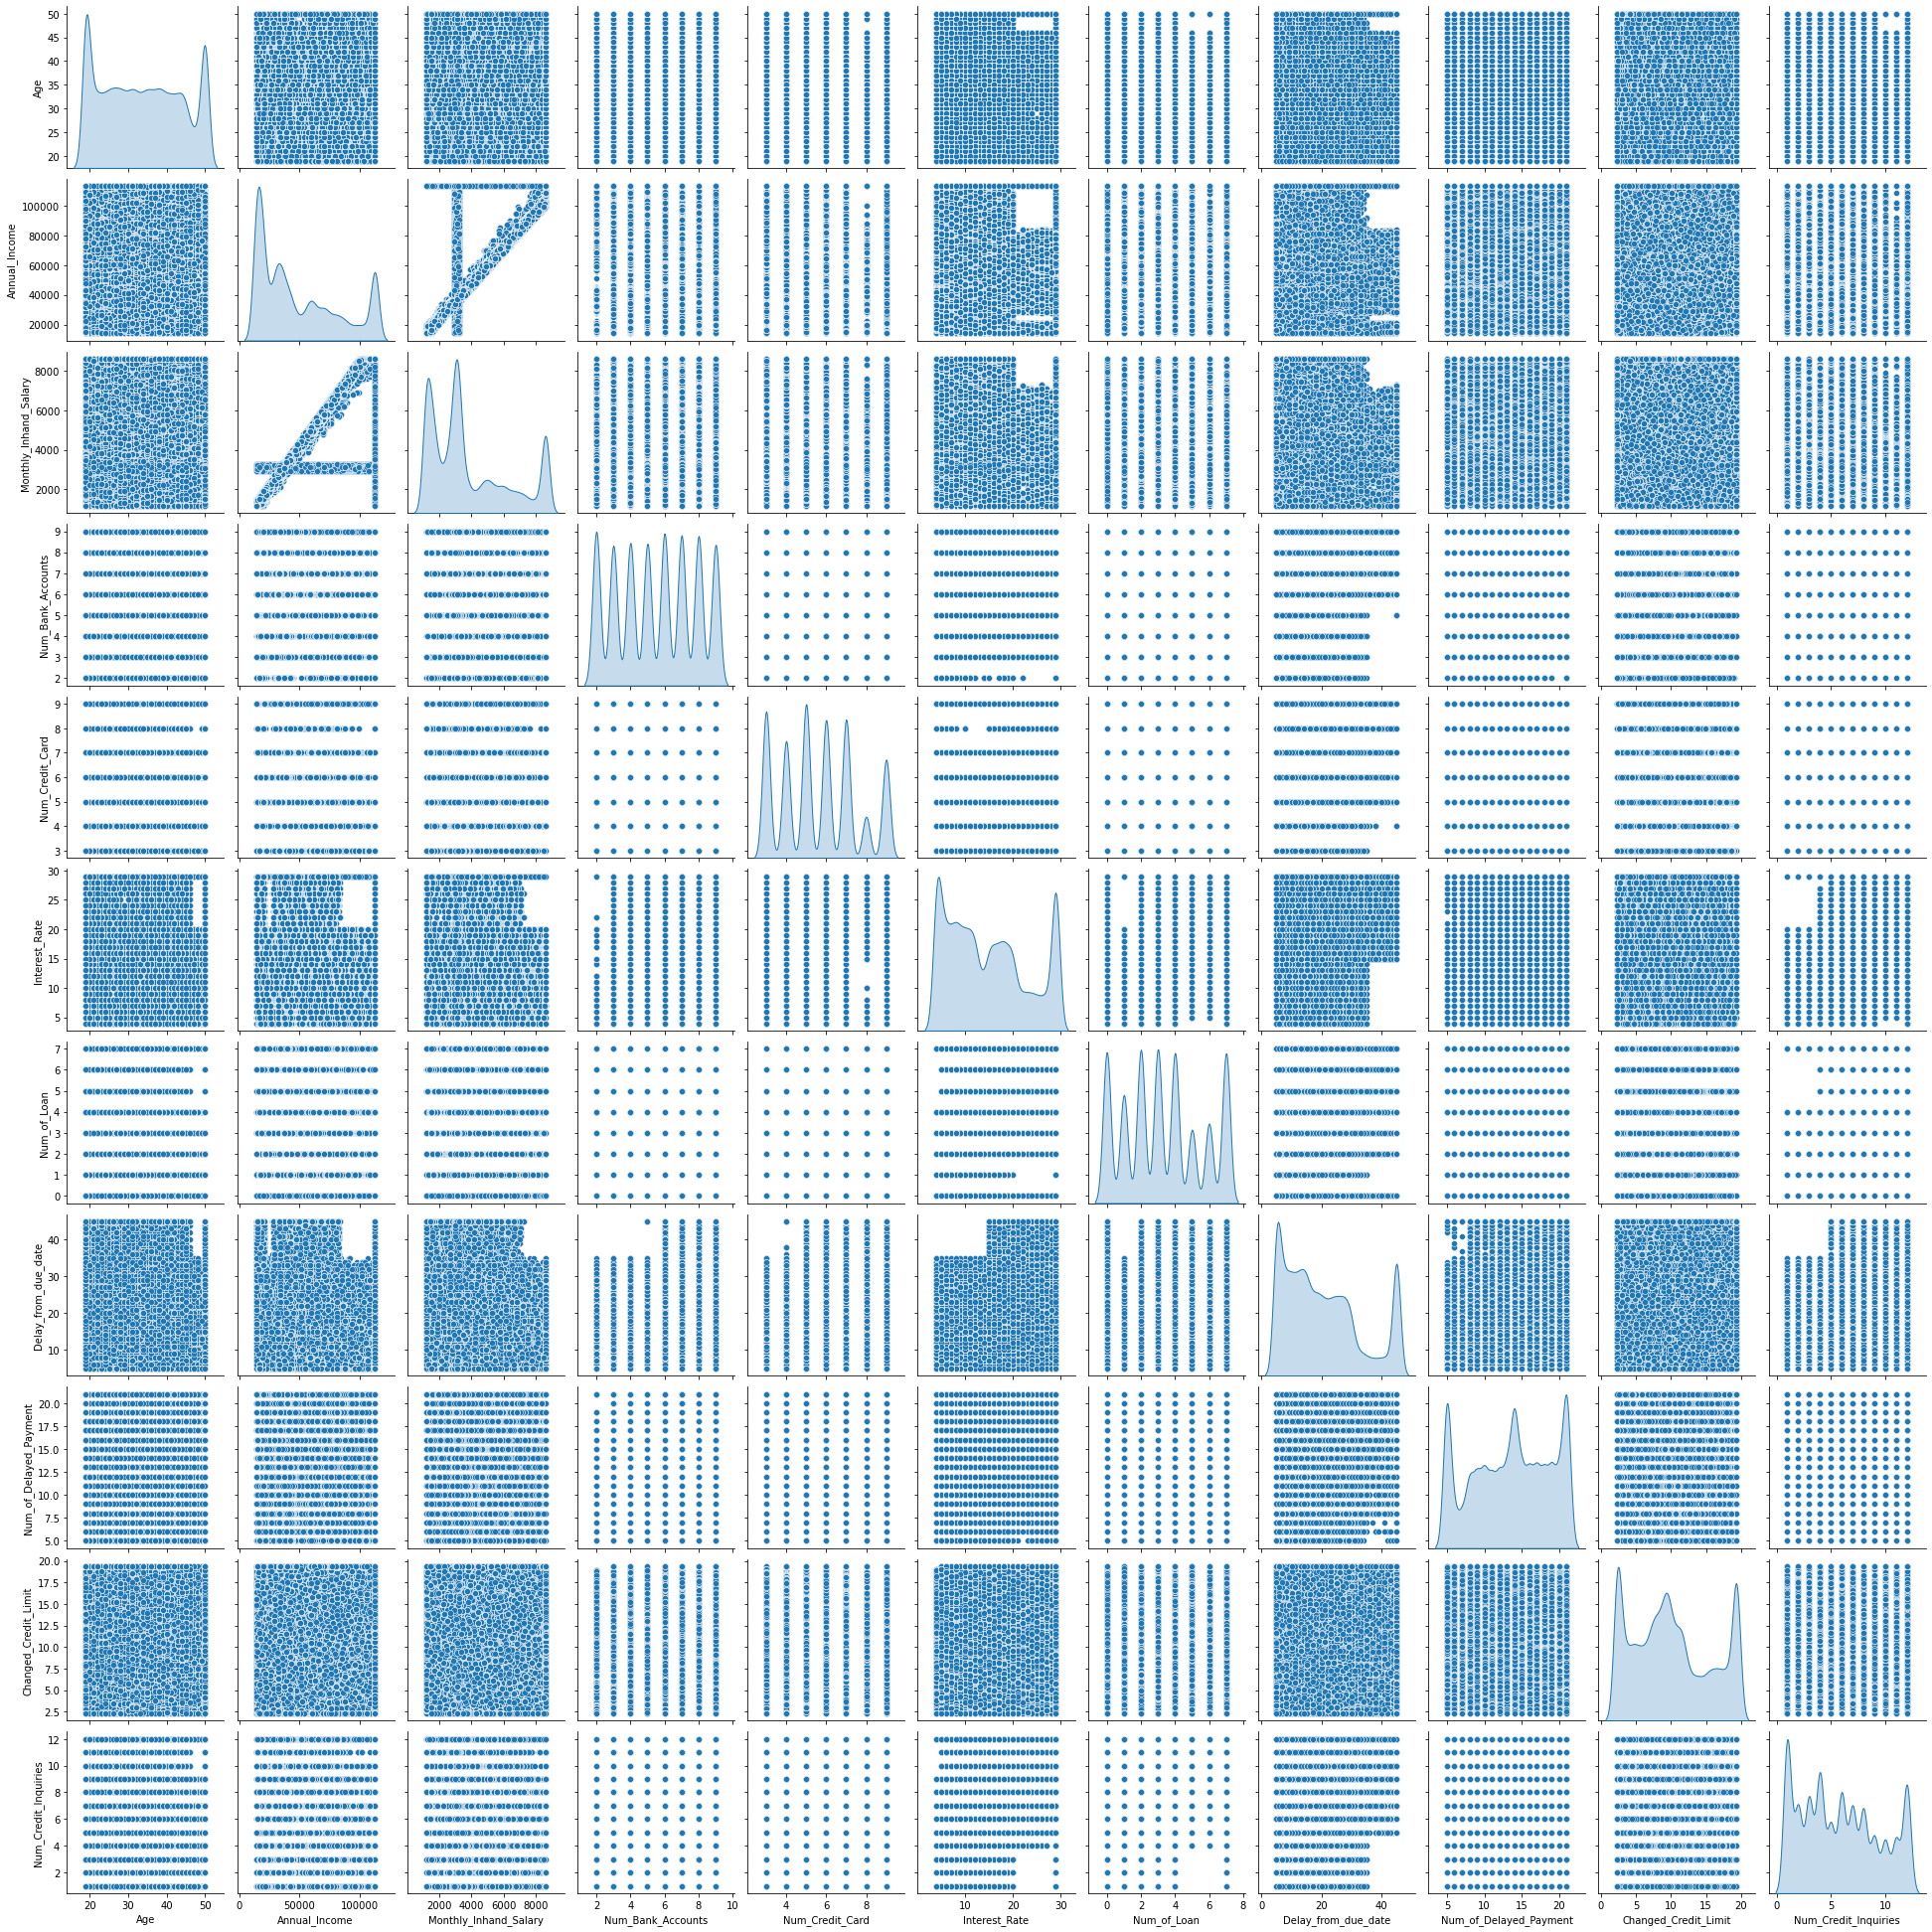

<Figure size 1152x1152 with 0 Axes>

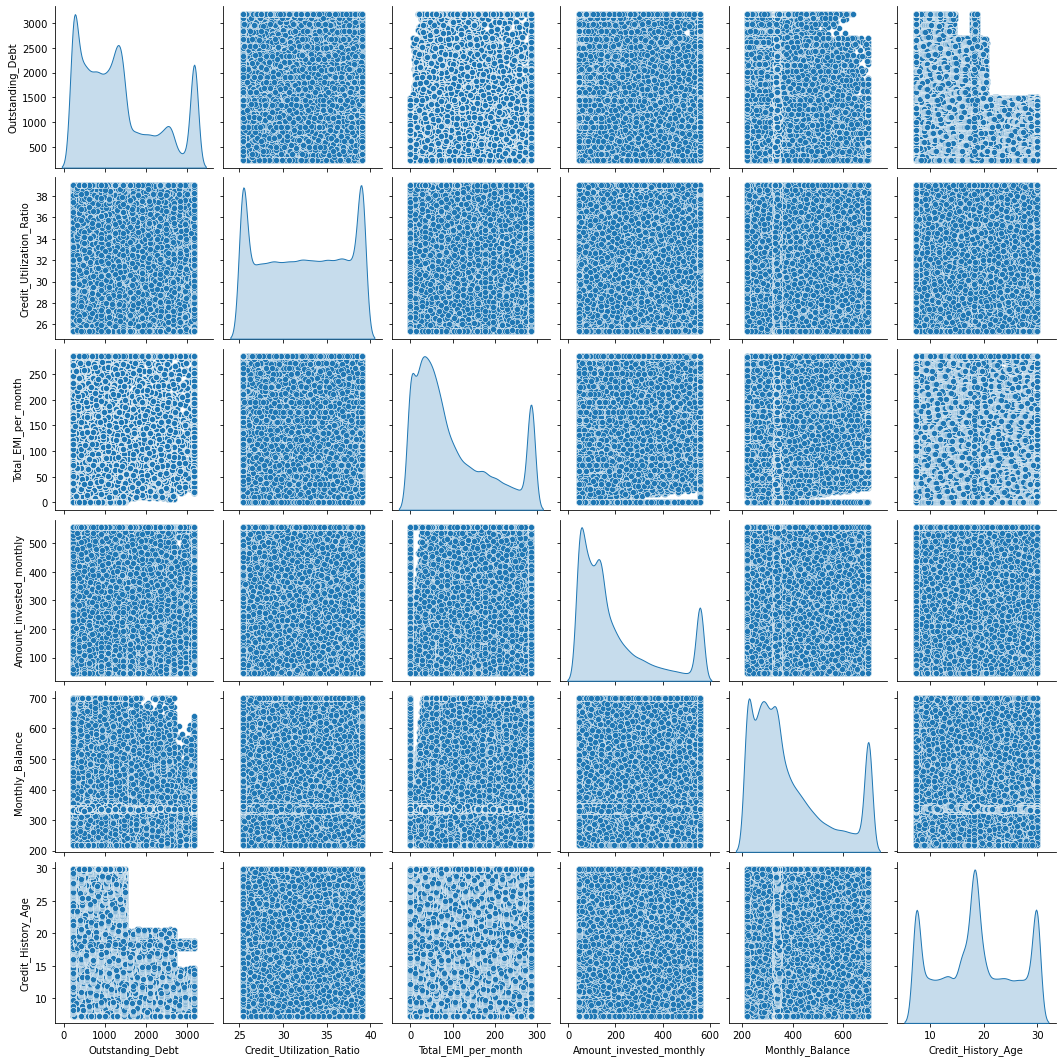

In [52]:
fig1 = plt.figure(figsize=(16,16));
sns.pairplot(df.iloc[:,np.hstack(([0],range(1,14)))],diag_kind='kde',palette='Set1');
fig2 = plt.figure(figsize=(16,16));
sns.pairplot(df.iloc[:,np.hstack(([0],range(14,24)))],diag_kind='kde',palette='Set1');

### Preprocessing before PCA, RFE and Model Selection

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='category').columns:
    if col=='Credit_Score'or col=='Credit_Mix':
        pass
    else:
        df[col]=le.fit_transform(df[col])

In [54]:
def ordinal_encoder(data,feature,feature_rank):
    
    ordinal_dict = {}
    
    for i, feature_value in enumerate(feature_rank):
        ordinal_dict[feature_value]=i+1
    
    data[feature] = data[feature].map(lambda x: ordinal_dict[x])
    
    return data

In [55]:
ordinal_encoder(df,'Credit_Score',['Good', 'Standard', 'Poor']).head()
ordinal_encoder(df,'Credit_Mix',['Good', 'Standard', 'Bad', 'Unknown']).head()
df['Credit_Mix']=df['Credit_Mix'].astype('int64')

In [56]:
features=df.select_dtypes(exclude='category')
features=list(features.columns)
features

['Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_History_Age']

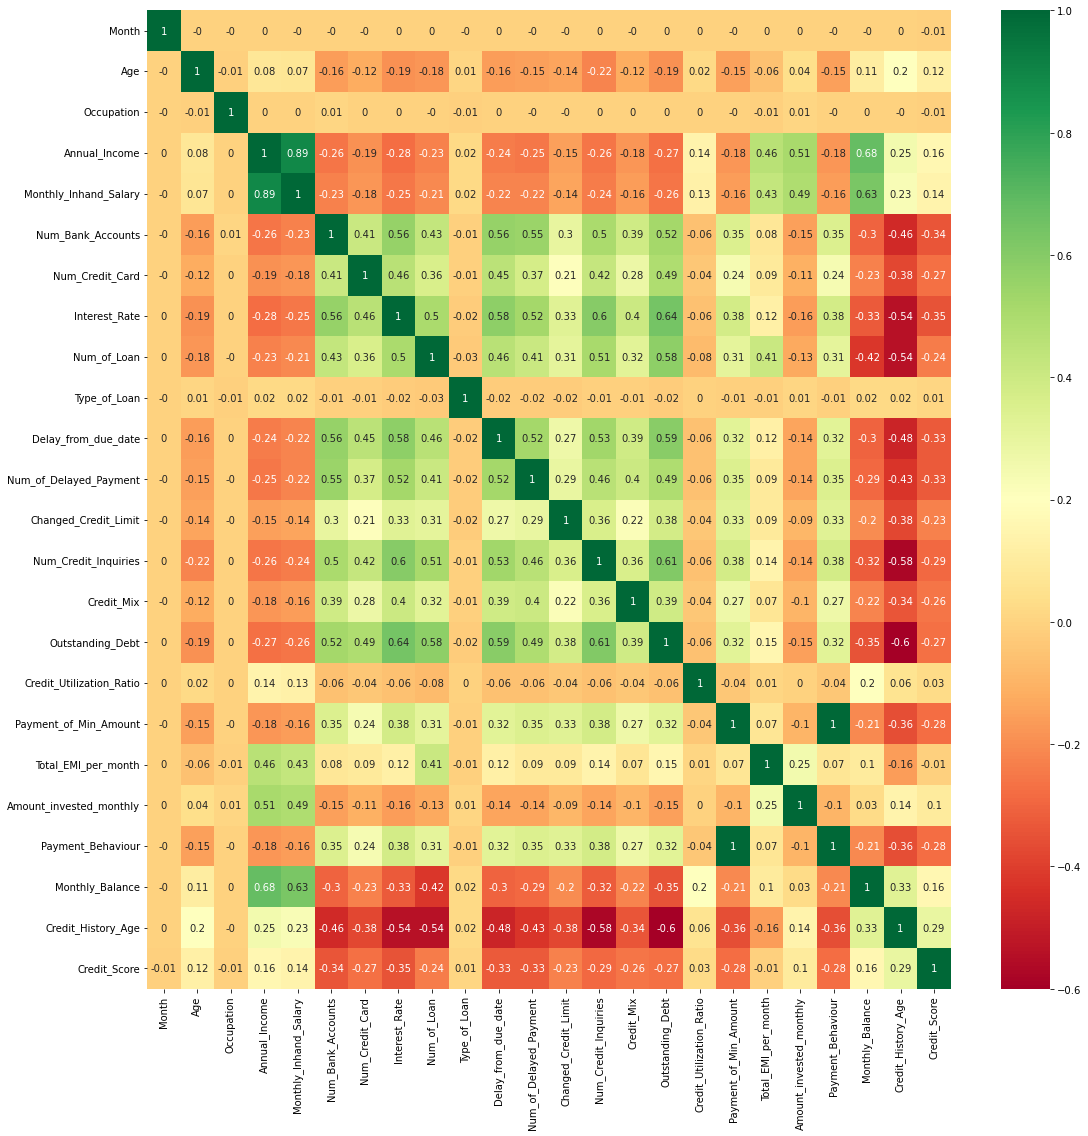

In [57]:
credit_df_heatmap=df.copy()
credit_df_heatmap['Credit_Score'] = df['Credit_Score'] .apply(lambda x : 1 if x == 1 else 0)
plt.figure(figsize=(18,18))

sns.heatmap(round(credit_df_heatmap[features +['Credit_Score']].corr(),2), annot=True, cmap='RdYlGn')

plt.show()

In [58]:
# Finding Columns which are highly co-related and then dropping it from the data

correlated_features = set()
correlation_matrix = df.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [59]:
correlated_features

{'Monthly_Inhand_Salary', 'Payment_Behaviour'}

In [60]:
df=df.drop(correlated_features, 1)

In [61]:

df.shape

(100000, 22)

In [62]:
test_df=df.tail(20000)
test_df.shape

(20000, 22)

In [63]:
credit=df.drop(df.tail(20000).index)

In [64]:
credit_X = credit.drop('Credit_Score', 1)
credit_Y = credit['Credit_Score']

In [65]:
credit_Test_X = test_df.drop('Credit_Score', 1)
credit_Test_Y = test_df['Credit_Score']

# Modelling

In [66]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier


## Logistic Regression with Stratified K fold

In [67]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
  
# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(credit_X)
test_x_scaled = scaler.fit_transform(credit_Test_X)
  
# Create  classifier object.
lr = linear_model.LogisticRegression()
  
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1)
lst_accu_stratified = []
for train_index, test_index in skf.split(credit_X, credit_Y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = credit_Y[train_index], credit_Y[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))
    
 
feature_importance = pd.DataFrame(credit_X.columns, columns = ["feature"])
feature_importance["importance"] = lr.coef_[0]
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)
print('Features and their coefficient for Logistic Regression\n')
print(feature_importance,'\n')
print('======================================================================================\n')
# Print the output.
print('\nResults based on Train-Validation Set:  \n')
print('List of possible accuracy based on Train-Validation Set:', lst_accu_stratified)
print('\nMaximum Accuracy that can be obtained from Logistic Regression model is:',
      max(lst_accu_stratified)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified))
print('======================================================================================\n')

print("\n Running the Logestic Regression Model on Test Data \n")
y_pred=lr.predict(test_x_scaled)
Y_test_proba = lr.predict_proba(test_x_scaled)[:,1]
print("\n Confusion Matrix: \n",confusion_matrix(credit_Test_Y, y_pred))
print("\n Classification Report :\n",classification_report(credit_Test_Y, y_pred))
print('======================================================================================\n')
print('Accuracy for Test Data Set', accuracy_score(credit_Test_Y, y_pred)*100)
print('Recall for Test Data Set', recall_score(credit_Test_Y, y_pred,  average='weighted')*100)
print('Precision for Test Data Set', precision_score(credit_Test_Y, y_pred, average='weighted')*100)
print('F1_Score for Test Data Set', f1_score(credit_Test_Y, y_pred, average='weighted')*100)
#plot_ROC(y_pred, Y_test_proba, 'Logistic Regression Classifier')

Features and their coefficient for Logistic Regression

                     feature  importance
9        Delay_from_due_date   -1.279510
6              Interest_Rate   -1.100050
5            Num_Credit_Card   -0.811108
16     Payment_of_Min_Amount   -0.574345
7                Num_of_Loan   -0.442024
12      Num_Credit_Inquiries   -0.320148
4          Num_Bank_Accounts   -0.300255
14          Outstanding_Debt   -0.262638
19           Monthly_Balance   -0.245125
10    Num_of_Delayed_Payment   -0.211770
13                Credit_Mix   -0.204619
2                 Occupation   -0.075757
11      Changed_Credit_Limit   -0.068896
0                      Month   -0.054459
18   Amount_invested_monthly   -0.039652
15  Credit_Utilization_Ratio   -0.025405
8               Type_of_Loan   -0.002323
3              Annual_Income    0.100395
1                        Age    0.110262
20        Credit_History_Age    0.420414
17       Total_EMI_per_month    0.481232 



Results based on Train-Validation Set:

## Random Forest Classifier with Stratified K fold

In [68]:
# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(credit_X)
test_x_scaled = scaler.fit_transform(credit_Test_X)
  
# Create  classifier object.
clf = RandomForestClassifier(n_estimators=100)
  
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(credit_X, credit_Y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = credit_Y[train_index], credit_Y[test_index]
    clf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
# Print the output.
print('Results based on Train-Validation Set:  \n')
print('List of possible accuracy based on Train-Validation Set:\n', lst_accu_stratified)
print('\nMaximum Accuracy that can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified))
print('======================================================================================\n')
print("\n Running the Model on Test Data \n")
y_pred=clf.predict(test_x_scaled)
print("\n Confusion Matrix: \n",confusion_matrix(credit_Test_Y, y_pred))
print("\n Classification Report : \n",classification_report(credit_Test_Y, y_pred))
print('======================================================================================\n')
print('Accuracy for Test Data Set', accuracy_score(credit_Test_Y, y_pred)*100)
print('Recall for Test Data Set', recall_score(credit_Test_Y, y_pred,  average='weighted')*100)
print('Precision for Test Data Set', precision_score(credit_Test_Y, y_pred, average='weighted')*100)
print('F1_Score for Test Data Set', f1_score(credit_Test_Y, y_pred, average='weighted')*100)

Results based on Train-Validation Set:  

List of possible accuracy based on Train-Validation Set:
 [0.78975, 0.788875, 0.78325, 0.786375, 0.781375, 0.78625, 0.7925, 0.775625, 0.7865, 0.773125]

Maximum Accuracy that can be obtained from this model is: 79.25 %
Minimum Accuracy: 77.3125 %
Overall Accuracy: 78.43625 %
Standard Deviation is: 0.006151572179352021


 Running the Model on Test Data 


 Confusion Matrix: 
 [[2478 1198   62]
 [1397 7982 1316]
 [ 330 1563 3674]]

 Classification Report : 
               precision    recall  f1-score   support

           1       0.59      0.66      0.62      3738
           2       0.74      0.75      0.74     10695
           3       0.73      0.66      0.69      5567

    accuracy                           0.71     20000
   macro avg       0.69      0.69      0.69     20000
weighted avg       0.71      0.71      0.71     20000


Accuracy for Test Data Set 70.67
Recall for Test Data Set 70.67
Precision for Test Data Set 70.98830380421823
F1_Sc

## GradientBoostingClassifier with Stratified K fold

In [69]:
# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(credit_X)
test_x_scaled = scaler.fit_transform(credit_Test_X)

# Create  classifier object.
clf = GradientBoostingClassifier(n_estimators=100)
  
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(credit_X, credit_Y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = credit_Y[train_index], credit_Y[test_index]
    clf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
  
 
# Print the output.
print('Results based on Train-Validation Set:  \n')
print('List of possible accuracy based on Train-Validation Set: \n', lst_accu_stratified)
print('\nMaximum Accuracy that can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified))
print('======================================================================================\n')
print("\n Running the Model on Test Data \n")
y_pred=clf.predict(test_x_scaled)
print("\n Confusion Matrix: \n",confusion_matrix(credit_Test_Y, y_pred))
print("\n Classification Report : \n",classification_report(credit_Test_Y, y_pred))
print('======================================================================================\n')
print('Accuracy for Test Data Set', accuracy_score(credit_Test_Y, y_pred)*100)
print('Recall for Test Data Set', recall_score(credit_Test_Y, y_pred,  average='weighted')*100)
print('Precision for Test Data Set', precision_score(credit_Test_Y, y_pred, average='weighted')*100)
print('F1_Score for Test Data Set', f1_score(credit_Test_Y, y_pred, average='weighted')*100)

Results based on Train-Validation Set:  

List of possible accuracy based on Train-Validation Set: 
 [0.699875, 0.701, 0.695125, 0.697, 0.703, 0.70575, 0.704, 0.696125, 0.694625, 0.6895]

Maximum Accuracy that can be obtained from this model is: 70.575 %
Minimum Accuracy: 68.95 %
Overall Accuracy: 69.86 %
Standard Deviation is: 0.005015531433014394


 Running the Model on Test Data 


 Confusion Matrix: 
 [[2440 1215   83]
 [1357 8144 1194]
 [ 307 1665 3595]]

 Classification Report : 
               precision    recall  f1-score   support

           1       0.59      0.65      0.62      3738
           2       0.74      0.76      0.75     10695
           3       0.74      0.65      0.69      5567

    accuracy                           0.71     20000
   macro avg       0.69      0.69      0.69     20000
weighted avg       0.71      0.71      0.71     20000


Accuracy for Test Data Set 70.895
Recall for Test Data Set 70.895
Precision for Test Data Set 71.15590926263513
F1_Score for T

## Decision Tree with RFE

In [70]:
accuracy_score_lst=[]
recall_score_lst=[]
precision_score_lst=[]
f1_score_lst=[]
Number_of_iteration=[]

for i in range(1,15):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    model = DecisionTreeClassifier()
    pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
    pipeline.fit(credit_X, credit_Y)
# make a prediction 
    yhat = pipeline.predict( credit_Test_X)
    cm = confusion_matrix(credit_Test_Y, yhat)
    Number_of_iteration.append(i)
    accuracy_score_lst.append(accuracy_score(credit_Test_Y, yhat)*100)
    recall_score_lst.append(recall_score(credit_Test_Y, yhat,  average='weighted')*100)
    precision_score_lst.append(precision_score(credit_Test_Y, yhat ,average='weighted')*100)
    f1_score_lst.append(f1_score(credit_Test_Y, yhat, average='weighted')*100)

#print(Number_of_iteration)
#print(accuracy_score_lst)
#print(recall_score_lst)
#print(precision_score_lst)
#print(f1_score_lst)

print("Number of Features giving highest accuracy for Decision Tree  :", accuracy_score_lst.index(max(accuracy_score_lst)))
print("Maximum Accuracy for Decision Tree with Recursive Feature Elimination is  :", max(accuracy_score_lst))

Number of Features giving highest accuracy for Decision Tree  : 13
Maximum Accuracy for Decision Tree with Recursive Feature Elimination is  : 58.040000000000006


## KNN

In [71]:
half_df = df.drop(df.tail(50000).index)
half_df.shape

x = half_df.drop('Credit_Score', 1)
y = half_df['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

from sklearn.model_selection import KFold

def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    params = np.random.uniform(param_range[0],param_range[1],10)
    params = np.array([int(i) for i in params])
    params = np.sort(params)
    # Reference link : https://towardsdatascience.com/why-and-how-to-cross-validate-a-model-d6424b45261f
    kf = KFold(n_splits=folds)
    
    x_train = pd.DataFrame(x_train)
    y_train = pd.DataFrame(y_train)

    TRAIN_SCORES = []
    TEST_SCORES  = [] 
    for p in params:
        training_scores = []
        crossval_scores = []
        classifier.n_neighbors = int(p)
        
        for i in range(folds):
            result = next(kf.split(x_train),None)
            x_training = x_train.iloc[result[0]]
            x_cv = x_train.iloc[result[1]]

            y_training = y_train.iloc[result[0]]
            y_cv = y_train.iloc[result[1]]
            
            model = classifier.fit(x_training,y_training)
            training_scores.append(model.score(x_training,y_training))
            crossval_scores.append(model.score(x_cv,y_cv))
        TRAIN_SCORES.append(np.mean(training_scores))
        TEST_SCORES.append(np.mean(crossval_scores))
    return(TRAIN_SCORES , TEST_SCORES)

classifier = KNeighborsClassifier()
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
train_score , cv_scores = RandomSearchCV(X_train,y_train,classifier,(1,100),5)

print(train_score)
print(cv_scores)

KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
KNN.score(X_train, y_train)
KNN.score(X_test, y_test)

print("\n Running the Model on Test Data \n")
print("\n Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))

[0.6457, 0.6426, 0.6388666666666667, 0.6378333333333334, 0.6221, 0.6192333333333333, 0.6182333333333333, 0.6125333333333334, 0.6111333333333333, 0.6100666666666666]
[0.606, 0.606, 0.6038666666666667, 0.6014666666666667, 0.5928, 0.592, 0.5914666666666667, 0.5872, 0.5853333333333334, 0.5849333333333333]

 Running the Model on Test Data 


 Confusion Matrix: 
 [[1471  713   36]
 [ 685 5075  843]
 [ 118  713 2846]]

 Classification Report : 
               precision    recall  f1-score   support

           1       0.65      0.66      0.65      2220
           2       0.78      0.77      0.77      6603
           3       0.76      0.77      0.77      3677

    accuracy                           0.75     12500
   macro avg       0.73      0.74      0.73     12500
weighted avg       0.75      0.75      0.75     12500

